# Tools

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt

# Dataset

In [ ]:
bc = load_breast_cancer()
print(bc.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting in 30 features.  For instance, field 0 is Mean Radius, field
    10 is Radius SE, field 20 is Worst Radius.

    - 

# Dataset info

In [ ]:
bc.target #Label

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [ ]:
bc.target.shape

(569,)

In [ ]:
bc.data[500]

array([1.504e+01, 1.674e+01, 9.873e+01, 6.894e+02, 9.883e-02, 1.364e-01,
       7.721e-02, 6.142e-02, 1.668e-01, 6.869e-02, 3.720e-01, 8.423e-01,
       2.304e+00, 3.484e+01, 4.123e-03, 1.819e-02, 1.996e-02, 1.004e-02,
       1.055e-02, 3.237e-03, 1.676e+01, 2.043e+01, 1.097e+02, 8.569e+02,
       1.135e-01, 2.176e-01, 1.856e-01, 1.018e-01, 2.177e-01, 8.549e-02])

In [ ]:
bc.data.shape

(569, 30)

# Pre-processing

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(bc.data, bc.target, test_size=0.2)

print(f'Feature => train: {x_train.shape} - test: {x_test.shape}')
print(f'Label => train: {y_train.shape} - test: {y_test.shape}')

Feature => train: (455, 30) - test: (114, 30)
Label => train: (455,) - test: (114,)


In [ ]:
x_train[0]

array([1.940e+01, 1.818e+01, 1.272e+02, 1.145e+03, 1.037e-01, 1.442e-01,
       1.626e-01, 9.464e-02, 1.893e-01, 5.892e-02, 4.709e-01, 9.951e-01,
       2.903e+00, 5.316e+01, 5.654e-03, 2.199e-02, 3.059e-02, 1.499e-02,
       1.623e-02, 1.965e-03, 2.379e+01, 2.865e+01, 1.524e+02, 1.628e+03,
       1.518e-01, 3.749e-01, 4.316e-01, 2.252e-01, 3.590e-01, 7.787e-02])

In [ ]:
scalar = MinMaxScaler(feature_range=(0, 1))

x_train = scalar.fit_transform(x_train)
x_test = scalar.transform(x_test)

In [ ]:
x_train[0]

array([0.58777036, 0.35310095, 0.57639417, 0.42481442, 0.46104541,
       0.38285995, 0.3809747 , 0.47037773, 0.45124594, 0.18389831,
       0.13014666, 0.14031559, 0.10111671, 0.08658605, 0.13397015,
       0.14824106, 0.19928339, 0.38171632, 0.11746496, 0.05087663,
       0.56421202, 0.46610903, 0.50794362, 0.35460087, 0.53245724,
       0.38173312, 0.36888889, 0.77388316, 0.39917209, 0.19354018])

# Calculate metrics

In [ ]:
def calculate_metrics(y_train, y_test, y_pred_train, y_pred_test):
  acc_train = accuracy_score(y_true=y_train, y_pred=y_pred_train)
  acc_test = accuracy_score(y_true=y_test, y_pred=y_pred_test)

  p = precision_score(y_true=y_test, y_pred=y_pred_test)
  r = recall_score(y_true=y_test, y_pred=y_pred_test)

  print(f'acc train: {acc_train} - acc test: {acc_test} - precision: {p} - recall: {r}')

  return acc_train, acc_test, p, r

# Classification

## Naive Bayes

In [ ]:
gnb = GaussianNB()
gnb.fit(x_train, y_train)

GaussianNB()

In [ ]:
y_pred_train = gnb.predict(x_train)
y_pred_test = gnb.predict(x_test)

acc_train_gnb, acc_test_gnb, p_gnb, r_gnb = calculate_metrics(y_train, y_test, y_pred_train, y_pred_test)

acc train: 0.9296703296703297 - acc test: 0.9210526315789473 - precision: 0.9705882352941176 - recall: 0.9041095890410958


##KNN

In [ ]:
knn = KNeighborsClassifier(n_neighbors=8, algorithm='kd_tree', leaf_size=28)
knn.fit(x_train, y_train)

KNeighborsClassifier(algorithm='kd_tree', leaf_size=28, n_neighbors=8)

In [ ]:
y_pred_train = knn.predict(x_train)
y_pred_test = knn.predict(x_test)

acc_train_knn, acc_test_knn, p_knn, r_knn = calculate_metrics(y_train, y_test, y_pred_train, y_pred_test)

acc train: 0.9692307692307692 - acc test: 0.9736842105263158 - precision: 0.972972972972973 - recall: 0.9863013698630136


## Decision Tree

In [ ]:
dt = DecisionTreeClassifier(max_depth=64, min_samples_split=2, criterion='gini')
dt.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=64)

In [ ]:
y_pred_train = dt.predict(x_train)
y_pred_test = dt.predict(x_test)

acc_train_dt, acc_test_dt, p_dt, r_dt = calculate_metrics(y_train, y_test, y_pred_train, y_pred_test)

acc train: 1.0 - acc test: 0.9298245614035088 - precision: 0.9577464788732394 - recall: 0.9315068493150684


## Random Forest

In [ ]:
rf = RandomForestClassifier(n_estimators=1000, max_depth=32, min_samples_split=4)
rf.fit(x_train, y_train)

RandomForestClassifier(max_depth=32, min_samples_split=4, n_estimators=1000)

In [ ]:
y_pred_train = dt.predict(x_train)
y_pred_test = dt.predict(x_test)

acc_train_rf, acc_test_rf, p_rf, r_rf = calculate_metrics(y_train, y_test, y_pred_train, y_pred_test)

acc train: 1.0 - acc test: 0.9298245614035088 - precision: 0.9577464788732394 - recall: 0.9315068493150684


## SVM

In [ ]:
svm = SVC(kernel='poly')
svm.fit(x_train, y_train)

SVC(kernel='poly')

In [ ]:
y_pred_train = svm.predict(x_train)
y_pred_test = svm.predict(x_test)

acc_train_svm, acc_test_svm, p_svm, r_svm = calculate_metrics(y_train, y_test, y_pred_train, y_pred_test)

acc train: 0.989010989010989 - acc test: 0.956140350877193 - precision: 0.9857142857142858 - recall: 0.9452054794520548


## Logistic Regression

In [ ]:
lr = LogisticRegression()
lr.fit(x_train, y_train)

LogisticRegression()

In [ ]:
y_pred_train = lr.predict(x_train)
y_pred_test = lr.predict(x_test)

acc_train_lr, acc_test_lr, p_lr, r_lr = calculate_metrics(y_train, y_test, y_pred_train, y_pred_test)

acc train: 0.9714285714285714 - acc test: 0.9736842105263158 - precision: 0.9861111111111112 - recall: 0.9726027397260274


## ANN

In [ ]:
ann = MLPClassifier(hidden_layer_sizes=216, activation='relu', solver='adam', batch_size=64)
ann.fit(x_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(batch_size=64, hidden_layer_sizes=216)

In [ ]:
y_pred_train = ann.predict(x_train)
y_pred_test = ann.predict(x_test)

acc_train_ann, acc_test_ann, p_ann, r_ann = calculate_metrics(y_train, y_test, y_pred_train, y_pred_test)

acc train: 0.989010989010989 - acc test: 0.9912280701754386 - precision: 1.0 - recall: 0.9863013698630136


# Comparison

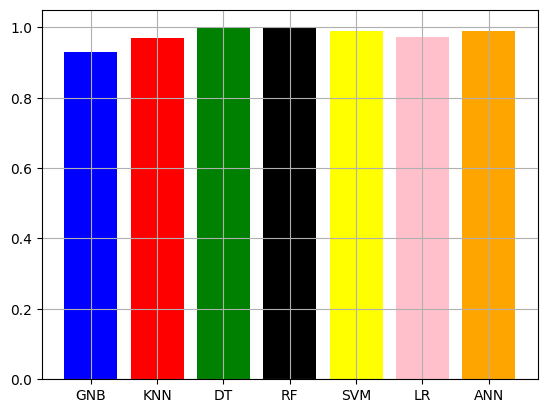

In [ ]:
acc_train = [acc_train_gnb, acc_train_knn, acc_train_dt, acc_train_rf, acc_train_svm, acc_train_lr, acc_train_ann]
title = ["GNB", "KNN", "DT", "RF", "SVM", "LR", "ANN"]
colors = ["blue", "red", "green", "black", "yellow", "pink", "orange"]

plt.bar(title, acc_train, color=colors)
plt.grid()
plt.show()

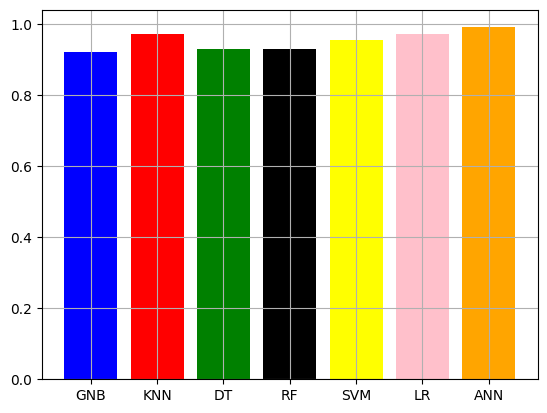

In [ ]:
acc_test = [acc_test_gnb, acc_test_knn, acc_test_dt, acc_test_rf, acc_test_svm, acc_test_lr, acc_test_ann]
title = ["GNB", "KNN", "DT", "RF", "SVM", "LR", "ANN"]
colors = ["blue", "red", "green", "black", "yellow", "pink", "orange"]

plt.bar(title, acc_test, color=colors)
plt.grid()
plt.show()

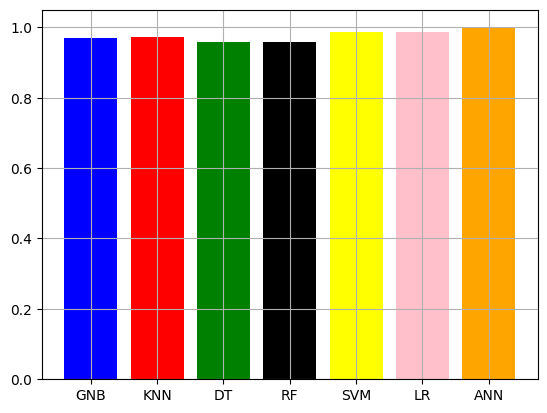

In [ ]:
p = [p_gnb, p_knn, p_dt, p_rf, p_svm, p_lr,p_ann]
title = ["GNB", "KNN", "DT", "RF", "SVM", "LR", "ANN"]
colors = ["blue", "red", "green", "black", "yellow", "pink", "orange"]

plt.bar(title, p, color=colors)
plt.grid()
plt.show()

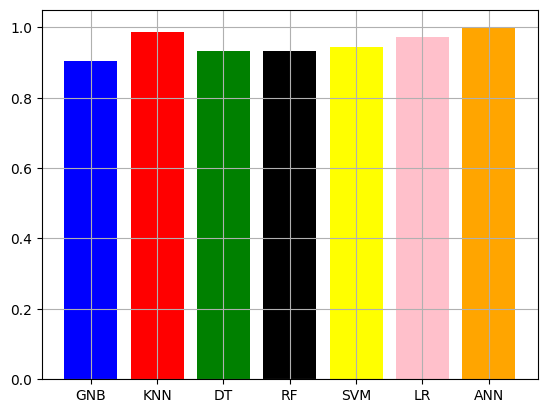

In [ ]:
r = [r_gnb, r_knn, r_dt, r_rf, r_svm, r_lr,p_ann]
title = ["GNB", "KNN", "DT", "RF", "SVM", "LR", "ANN"]
colors = ["blue", "red", "green", "black", "yellow", "pink", "orange"]

plt.bar(title, r, color=colors)
plt.grid()
plt.show()